<a href="https://colab.research.google.com/github/emanuel379/EDO/blob/main/Gr%C3%A1ficos_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas a serem importadas para que os códigos funcionem

import pylab as p
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import math
from scipy import integrate

Códigos utilizados no trabalho, com constantes, intervalo de tempo e tamanho das populações já fixados.

A_f0= [[ 1.  -0. ]
 [ 0.  -1.5]]
autovalores: [0.+1.22474487j 0.-1.22474487j]
autovetores: [[-0.85280287+0.j         -0.85280287-0.j        ]
 [ 0.        +0.52223297j  0.        -0.52223297j]]
período: 5.130199320647456


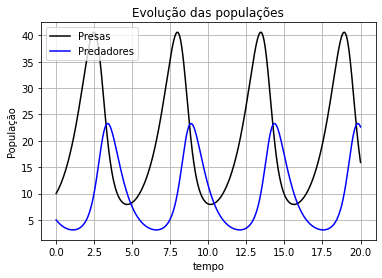

In [ ]:
# Definindo as constantes
a = 1.0
b = 0.1
c = 1.5
d = 0.75

def dX_dt( X, t = 0):
  # Retorna a taxa de crescimento das populações de presas e predadores.
  return np.array([ a * X [ 0 ] - b * X [ 0 ] * X [1 ] ,
  - c * X [ 1 ] + d * b * X [ 0 ] * X [ 1 ] ])

X_f0 = np.array ([ 0.0, 0.0])
X_f1 = np.array([ c/ ( d * b), a/ b])

def d2X_dt2( X, t = 0):
  # Retorna a matriz Jacobiana avaliada em X.
  return np.array([[ a - b * X [ 1], - b * X [ 0 ]],
  [ b * d * X [ 1 ] , - c + b * d * X [ 0 ]]])

A_f0 = d2X_dt2 ( X_f0)
print('A_f0=',A_f0)

A_f1 = d2X_dt2 ( X_f1 )
# Autovalores definidos por +/- sqrt(c * a).j:
lambda1 , lambda2 = la.eigvals( A_f1)

eigvals, eigvecs = la.eig(A_f1)
print('autovalores:',eigvals)
print('autovetores:', eigvecs)

T_f1 = 2 *math.pi/abs( lambda1)
print('período:', T_f1)

# Tempo
t = np.linspace( 0, 20, 1000)
# População inicial, nesse caso 10 presas e 5 predadores.
X0 = np.array([ 10, 5])
X, infodict = integrate.odeint( dX_dt, X0, t, full_output = True)
infodict[ 'message']

rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Presas', color = 'black') # color para definir qual cor queremos para as linhas no gráfco
p.plot(t, foxes , 'b-', label='Predadores', color = 'blue')
p.grid()
p.legend(loc='best')
p.xlabel('tempo')
p.ylabel('População')
p.title('Evolução das populações')
f1.savefig('presas_e_predadores_1.png')

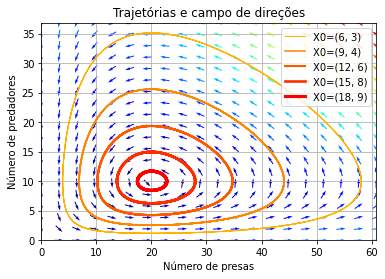

In [ ]:
values = np.linspace(0.3, 0.9, 5) # Valores para X0 no intervalo X_f0 e X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1.0, len(values))) # definindo as cores para cada uma das trajetórias
f2 = p.figure()
# plotando as trajetórias
for v, col in zip(values, vcolors):
  X0 = v * X_f1 # ponto inicial
  X = integrate.odeint( dX_dt, X0, t)
  p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]))
ymax = p.ylim(ymin=0)[1]
xmax = p.xlim(xmin=0)[1]
nb_points = 20
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X1, Y1 = np.meshgrid(x, y) # cria a malha
DX1, DY1 = dX_dt([X1, Y1]) # calcula a taxa de crescimento populacional
M = (np.hypot(DX1, DY1)) # norma da taxa de crescimento da população
M[ M == 0] = 1. # evita erro de divisão por zero
DX1 /= M # Normaliza cada feclha do campo direcional
DY1 /= M

# Desenhando o campo de direções.
# Cores para trazer noções acerca da velocidade de crescimento
p.title('Trajetórias e campo de direções')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Número de presas')
p.ylabel('Número de predadores')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('presas_e_predadores_2.png')

Códigos para testes da equipe e do docente(valores não fixados).

1.1
0.3
0.9
0.6
A_f0= [[ 1.1 -0. ]
 [ 0.  -0.9]]
autovalores: [-5.55111512e-17+0.99498744j -5.55111512e-17-0.99498744j]
autovetores: [[8.33333333e-01+0.j        8.33333333e-01-0.j       ]
 [3.08395285e-17-0.5527708j 3.08395285e-17+0.5527708j]]
período: 6.3148388339965535
0
30
20
15


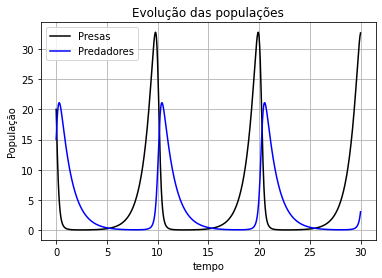

In [ ]:
# Definindo as constantes que queremos nas nossas funções
a = float(input())
b = float(input())
c = float(input())
d = float(input())

def dX_dt( X, t = 0):
  # Retorna a taxa de crescimento das populações de presas e predadores.
  return np.array([ a * X [ 0 ] - b * X [ 0 ] * X [1 ] ,
  - c * X [ 1 ] + d * b * X [ 0 ] * X [ 1 ] ])

X_f0 = np.array ([ 0.0, 0.0])
X_f1 = np.array([ c/ ( d * b), a/ b])

def d2X_dt2( X, t = 0):
  # Retorna a matriz Jacobiana avaliada em X.
  return np.array([[ a - b * X [ 1], - b * X [ 0 ]],
  [ b * d * X [ 1 ] , - c + b * d * X [ 0 ]]])

A_f0 = d2X_dt2 ( X_f0)

A_f1 = d2X_dt2 ( X_f1 )
# Autovalores definidos por +/- sqrt(c * a).j:
lambda1 , lambda2 = la.eigvals( A_f1)

eigvals, eigvecs = la.eig(A_f1)

T_f1 = 2 *math.pi/abs( lambda1)

# Tempo
t = np.linspace( int(input()), int(input()), 1000) # Ordem crescente, primeiro digitar um valor menor, depois um maior

X0 = np.array([ int(input()), int(input())]) # Definindo o tamanho das populações de presas e predadores, respectivamente
X, infodict = integrate.odeint( dX_dt, X0, t, full_output = True)
infodict[ 'message']


print('A_f0=',A_f0)
print('autovalores:',eigvals)
print('autovetores:', eigvecs)
print('período:', T_f1)

rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Presas', color = 'black') # color para definir qual cor queremos para as linhas no gráfco
p.plot(t, foxes , 'b-', label='Predadores', color = 'blue')
p.grid()
p.legend(loc='best')
p.xlabel('tempo')
p.ylabel('População')
p.title('Evolução das populações')
f1.savefig('presas_e_predadores_1.png')

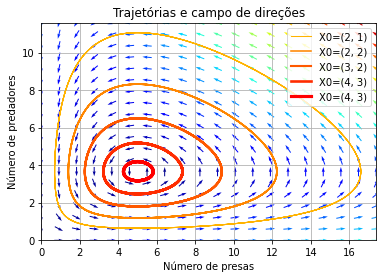

In [ ]:
# Plotando o gráfico do campo de direções com as constantes, intervalo temporal e populações definidos acima

values = np.linspace(0.3, 0.9, 5) # Valores para X0 no intervalo X_f0 e X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1.0, len(values))) # definindo as cores para cada uma das trajetórias
f2 = p.figure()
# plotando as trajetorias
for v, col in zip(values, vcolors):
  X0 = v * X_f1 # ponto inicial
  X = integrate.odeint( dX_dt, X0, t)
  p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]))
ymax = p.ylim(ymin=0)[1]
xmax = p.xlim(xmin=0)[1]
nb_points = 20
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X1, Y1 = np.meshgrid(x, y) # cria a malha
DX1, DY1 = dX_dt([X1, Y1]) # calcula a taxa de crescimento populacional
M = (np.hypot(DX1, DY1)) # norma da taxa de crescimento da população
M[ M == 0] = 1. # evita erro de divisão por zero
DX1 /= M # Normaliza cada feclha do campo direcional
DY1 /= M

# Desenhando o campo de direções.
# Cores para trazer noções acerca da velocidade de crescimento
p.title('Trajetórias e campo de direções')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Número de presas')
p.ylabel('Número de predadores')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('presas_e_predadores_2.png')